In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
eco =pd.read_csv("../data/시도_성별_경제활동인구_총괄_KOSIS_2022.csv", encoding='euc-kr')
eco

In [ ]:
eco["고용률(%)"] = round(eco['취업자 (천명)'] / eco['15세이상인구 (천명)'] * 100,1)
eco['실업률(%)'] = round(eco['실업자 (천명)']/eco['경제활동인구 (천명)']*100,1)
eco

In [ ]:
eco[['행정구역(시도)','실업자 (천명)']]

In [5]:
eco_series = eco.groupby('행정구역(시도)')['실업자 (천명)'].sum()

In [6]:
eco_series.index
colors = sns.color_palette("pastel")

In [ ]:
plt.pie(eco_series, labels= eco_series.index, autopct='%.1f%%', colors=colors)
plt.legend(bbox_to_anchor=(1.7,1), loc = 1)
plt.show()

#### 한국 복지 패널 데이터
- 한국보건사회연구원에서 가구의 경제활동을 연구해 복지 정책을 반영할 목적으로 발간한 자료
- 전국 7천여가구를 선정해 2006년부터 2019년까지 조사한 자료

In [8]:
welfare = pd.read_csv("../data/welfare.csv")

In [9]:
welfare.info()
# income 과 code_job에 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       14418 non-null  int64  
 1   birth        14418 non-null  int64  
 2   marriage     14418 non-null  int64  
 3   religion     14418 non-null  int64  
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  14418 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 788.6 KB


In [10]:
welfare.isnull().sum()

gender            0
birth             0
marriage          0
religion          0
income         9884
code_job       7540
code_region       0
dtype: int64

In [11]:
wel_df = welfare.copy()

In [12]:
wel_df

,gender,birth,marriage,religion,income,code_job,code_region
0,2,1945,2,1,NaN,NaN,1
1,1,1948,2,2,NaN,NaN,1
2,1,1942,3,1,107.0,762.0,1
3,1,1962,1,1,192.0,855.0,1
4,2,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,2,1967,1,1,NaN,NaN,5
14414,2,1992,5,1,NaN,NaN,5
14415,1,1995,5,1,NaN,910.0,5
14416,2,1998,5,1,200.0,246.0,5


#### 종교의 유무가 이혼과 연관성이 있을까?

In [13]:
np.unique(wel_df['gender']) # 1:남성, 2:여성

array([1, 2], dtype=int64)

In [14]:
wel_df['gender'] = np.where(wel_df['gender']==1,"male","female")

In [15]:
wel_df

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,1,NaN,NaN,1
1,male,1948,2,2,NaN,NaN,1
2,male,1942,3,1,107.0,762.0,1
3,male,1962,1,1,192.0,855.0,1
4,female,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,1,NaN,NaN,5
14414,female,1992,5,1,NaN,NaN,5
14415,male,1995,5,1,NaN,910.0,5
14416,female,1998,5,1,200.0,246.0,5


In [16]:
w_gender = wel_df.groupby('gender', as_index=False).agg(cnt=('gender','count'))
w_gender

,gender,cnt
0,female,7913
1,male,6505


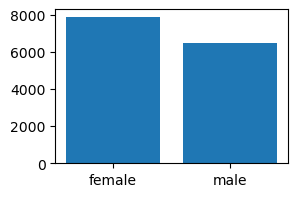

In [17]:
plt.figure(figsize=(3,2))
plt.bar(w_gender['gender'],w_gender['cnt'])
plt.show()

<Axes: xlabel='gender', ylabel='count'>

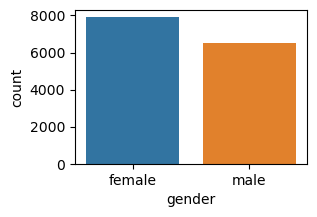

In [18]:
#seaborn
#matplotlib에서 파생된 라이브러리

#seaborn- countplot
#countplot(data=,x축 설정-문자열로 컬럼명)
plt.figure(figsize=(3,2))
sns.countplot(wel_df,x='gender')

In [19]:
# 종교여부 데이터 바꿔주기
# 1 - yes, 2- no

In [20]:
wel_df['religion'] = np.where(wel_df['religion']==1,'yes','no')
wel_df

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,2,yes,NaN,NaN,1
1,male,1948,2,no,NaN,NaN,1
2,male,1942,3,yes,107.0,762.0,1
3,male,1962,1,yes,192.0,855.0,1
4,female,1963,1,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,1,yes,NaN,NaN,5
14414,female,1992,5,yes,NaN,NaN,5
14415,male,1995,5,yes,NaN,910.0,5
14416,female,1998,5,yes,200.0,246.0,5


<Axes: xlabel='religion', ylabel='count'>

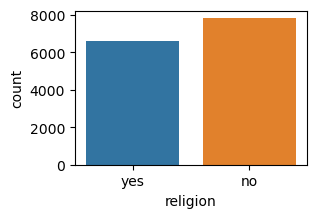

In [21]:
plt.figure(figsize=(3,2))
sns.countplot(wel_df,x='religion')

In [22]:
#marriage 여부 확인
wel_df['marriage'].value_counts()

marriage
1    7190
5    2357
0    2121
2    1954
3     689
4      78
6      29
Name: count, dtype: int64

In [23]:
#marriage
# 0 : 미해당자(미성년자), 1:결혼, 2:사별, 3:이혼, 4:별거, 5:미혼, 6:기타
# 1 - marriage 
# 3,4 - divorce
# 5 - not marriage
# 나머지 - etc

In [24]:
def changeMarriage(row):
    if row['marriage'] == 1:
        return 'marriage'
    elif row['marriage'] == 3 or row['marriage'] == 4:
        return 'divorce'
    elif row['marriage'] == 5:
        return 'not marriage'
    else:
        return 'etc'


In [25]:
wel_df.apply(changeMarriage, axis=1)
wel_df.apply(changeMarriage, axis=1).value_counts()

marriage        7190
etc             4104
not marriage    2357
divorce          767
Name: count, dtype: int64

In [26]:
wel_df['marriage'] = wel_df.apply(changeMarriage, axis=1)
wel_df

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


<Axes: xlabel='marriage', ylabel='count'>

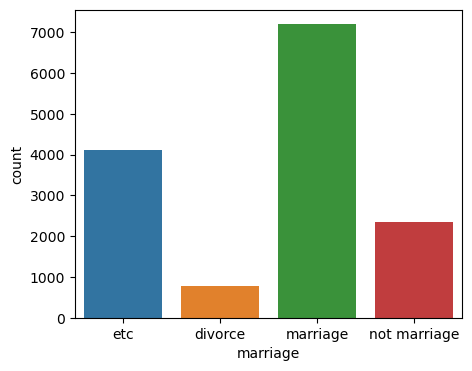

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(wel_df,x='marriage')

In [28]:
# 이혼률/혼인률
# 이혼 혹은 결혼하신분들의 종교 유무
wel_df.query("marriage == 'marriage' or marriage == 'divorce'")

,gender,birth,marriage,religion,income,code_job,code_region
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
6,male,1927,marriage,yes,NaN,NaN,1
7,female,1934,marriage,yes,27.0,941.0,1
...,...,...,...,...,...,...,...
14408,female,1936,marriage,no,NaN,611.0,6
14410,male,1956,marriage,yes,200.0,854.0,6
14411,female,1958,marriage,yes,NaN,611.0,6
14412,male,1967,marriage,yes,NaN,874.0,5


In [29]:
rel_div = wel_df.query("marriage == 'marriage' or marriage == 'divorce'").groupby('religion',as_index=False)['marriage'].value_counts(normalize=True)
#nomalrize=True : valuecounts 결과값을 비율로 바꿔주는 매개변수
rel_div

,religion,marriage,proportion
0,no,marriage,0.895961
1,no,divorce,0.104039
2,yes,marriage,0.911674
3,yes,divorce,0.088326


In [30]:
rel_div['proportion'] = round(rel_div['proportion']*100,2)
rel_div

,religion,marriage,proportion
0,no,marriage,89.60
1,no,divorce,10.40
2,yes,marriage,91.17
3,yes,divorce,8.83


<Axes: xlabel='religion', ylabel='proportion'>

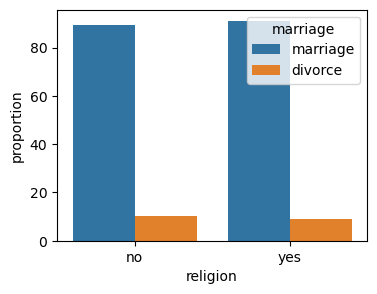

In [31]:
#sns.barplot(data,x = 컬럼명 문자열로 작성,y = 컬럼명 문자열로 작성,hue='색상이 변경되는 컬럼명 문자열 작성')
plt.figure(figsize=(4,3))
sns.barplot(data=rel_div,x='religion',y='proportion',hue='marriage')

## 종교와 결혼유무/이혼유무와는 상관관계가 없다.

### 성별 별 수입 확인

In [32]:
wel_df

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
2,male,1942,divorce,yes,107.0,762.0,1
3,male,1962,marriage,yes,192.0,855.0,1
4,female,1963,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5
14416,female,1998,not marriage,yes,200.0,246.0,5


In [33]:
wel_df['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [34]:
wel_df.query("income == 0")

,gender,birth,marriage,religion,income,code_job,code_region
4715,female,1983,marriage,no,0.0,311.0,5
6347,female,1983,marriage,yes,0.0,252.0,1
6632,female,1991,not marriage,yes,0.0,313.0,2
10487,female,1980,marriage,no,0.0,311.0,3
10620,female,1985,marriage,yes,0.0,320.0,3
10818,female,1981,marriage,yes,0.0,243.0,3
13654,female,1978,marriage,yes,0.0,252.0,6


In [35]:
job_code = pd.read_csv("../data/job_code.csv",encoding='euc-kr')
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [36]:
wel_df.query("code_job == 252")

,gender,birth,marriage,religion,income,code_job,code_region
409,male,1982,marriage,no,450.0,252.0,1
577,female,1973,marriage,yes,525.0,252.0,2
735,female,1978,marriage,yes,510.0,252.0,1
894,female,1975,marriage,no,508.0,252.0,1
897,female,1979,marriage,no,400.0,252.0,7
...,...,...,...,...,...,...,...
13644,female,1985,not marriage,no,458.0,252.0,3
13654,female,1978,marriage,yes,0.0,252.0,6
13655,male,1977,marriage,yes,499.0,252.0,6
13883,male,1964,marriage,no,759.0,252.0,5


In [37]:
wel_df[wel_df['income'].isna()]

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
4,female,1963,marriage,yes,NaN,NaN,1
5,female,2003,etc,yes,NaN,NaN,1
6,male,1927,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14412,male,1967,marriage,yes,NaN,874.0,5
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5
14415,male,1995,not marriage,yes,NaN,910.0,5


In [38]:
#찐 백수 찾기
wel_df.query("income.isna() and code_job.isna()")

,gender,birth,marriage,religion,income,code_job,code_region
0,female,1945,etc,yes,NaN,NaN,1
1,male,1948,etc,no,NaN,NaN,1
4,female,1963,marriage,yes,NaN,NaN,1
5,female,2003,etc,yes,NaN,NaN,1
6,male,1927,marriage,yes,NaN,NaN,1
...,...,...,...,...,...,...,...
14407,male,1933,marriage,no,NaN,NaN,6
14409,female,1934,etc,yes,NaN,NaN,6
14413,female,1967,marriage,yes,NaN,NaN,5
14414,female,1992,not marriage,yes,NaN,NaN,5


In [39]:
drop_index = wel_df.query("income.isna() and code_job.isna()").index
drop_index

Index([    0,     1,     4,     5,     6,     9,    10,    11,    12,    13,
       ...
       14397, 14400, 14403, 14404, 14406, 14407, 14409, 14413, 14414, 14417],
      dtype='int64', length=7540)

In [40]:
wel_df_drop = wel_df.drop(drop_index)
wel_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6878 entries, 2 to 14416
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       6878 non-null   object 
 1   birth        6878 non-null   int64  
 2   marriage     6878 non-null   object 
 3   religion     6878 non-null   object 
 4   income       4534 non-null   float64
 5   code_job     6878 non-null   float64
 6   code_region  6878 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 429.9+ KB


In [41]:
wel_df_drop.index = range(len(wel_df_drop))

In [42]:
wel_df_drop.query("income.isna()")

,gender,birth,marriage,religion,income,code_job,code_region
7,male,1975,not marriage,yes,NaN,521.0,1
8,male,1978,marriage,no,NaN,151.0,1
9,female,1982,marriage,no,NaN,521.0,1
17,female,1961,divorce,yes,NaN,951.0,1
18,female,1982,marriage,no,NaN,531.0,1
...,...,...,...,...,...,...,...
6868,male,1941,marriage,no,NaN,611.0,6
6872,female,1936,marriage,no,NaN,611.0,6
6874,female,1958,marriage,yes,NaN,611.0,6
6875,male,1967,marriage,yes,NaN,874.0,5


In [43]:
job_code.query("code_job == 910")

,code_job,job
141,910,건설 및 광업 단순 종사자


In [44]:
# 직종별 nan 값이 몇개인지 알아보기
wel_df_drop.query("income.isna()")['code_job']

7       521.0
8       151.0
9       521.0
17      951.0
18      531.0
        ...  
6868    611.0
6872    611.0
6874    611.0
6875    874.0
6876    910.0
Name: code_job, Length: 2344, dtype: float64

In [45]:
np.unique(wel_df_drop.query("income.isna()")['code_job'],return_counts=True)

(array([111., 121., 131., 132., 139., 141., 149., 151., 152., 153., 159.,
        221., 222., 223., 231., 234., 235., 241., 242., 245., 247., 248.,
        254., 259., 261., 271., 273., 274., 281., 282., 283., 284., 285.,
        286., 312., 313., 314., 330., 399., 421., 422., 423., 429., 431.,
        432., 441., 442., 510., 521., 522., 531., 532., 611., 612., 613.,
        620., 630., 710., 721., 722., 730., 741., 742., 743., 751., 752.,
        753., 761., 762., 771., 772., 781., 782., 783., 791., 792., 799.,
        811., 819., 821., 822., 823., 841., 842., 851., 852., 854., 862.,
        863., 873., 874., 875., 882., 892., 899., 910., 921., 922., 930.,
        941., 942., 951., 952., 953., 991., 999.]),
 array([  1,   3,   1,   1,   5,   7,   5,  11,   7,   4,   8,   2,   4,
          1,   6,   1,   3,   2,   3,   3,   8,  10,  19,  19,   2,   3,
          2,   9,   3,   1,   2,   4,   6,   4,   8,  12,   4,   1,   8,
          4,  39,   1,   6,   8,  15,  61,  86,  28, 188,   2, 

In [46]:
drop2_index = wel_df_drop.query("income.isna()").index
drop2_index

Index([   7,    8,    9,   17,   18,   19,   20,   35,   37,   43,
       ...
       6857, 6860, 6861, 6865, 6866, 6868, 6872, 6874, 6875, 6876],
      dtype='int64', length=2344)

In [47]:
wel_df_drop2 = wel_df_drop.drop(drop2_index)
wel_df_drop2

,gender,birth,marriage,religion,income,code_job,code_region
0,male,1942,divorce,yes,107.0,762.0,1
1,male,1962,marriage,yes,192.0,855.0,1
2,female,1934,marriage,yes,27.0,941.0,1
3,female,1940,etc,yes,27.0,999.0,2
4,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6869,male,1966,marriage,yes,280.0,874.0,6
6870,female,1962,marriage,yes,209.0,930.0,6
6871,female,1947,etc,no,27.0,941.0,6
6873,male,1956,marriage,yes,200.0,854.0,6


In [48]:
wel_df_drop2.describe()

,birth,income,code_job,code_region
count,4534.000000,4534.000000,4534.000000,4534.000000
mean,1971.144685,268.455007,567.397883,3.475739
std,15.290056,198.021206,293.097983,2.043582
min,1928.000000,0.000000,111.000000,1.000000
25%,1961.000000,150.000000,312.000000,2.000000
50%,1972.000000,220.000000,442.000000,3.000000
75%,1982.000000,345.750000,921.000000,5.000000
max,2001.000000,1892.000000,1009.000000,7.000000


In [49]:
drop3_index = wel_df_drop2.query("income == 0").index
wel_df_drop3 = wel_df_drop2.drop(drop3_index)

In [50]:
wel_df_drop3

,gender,birth,marriage,religion,income,code_job,code_region
0,male,1942,divorce,yes,107.0,762.0,1
1,male,1962,marriage,yes,192.0,855.0,1
2,female,1934,marriage,yes,27.0,941.0,1
3,female,1940,etc,yes,27.0,999.0,2
4,male,1978,marriage,no,338.0,312.0,1
...,...,...,...,...,...,...,...
6869,male,1966,marriage,yes,280.0,874.0,6
6870,female,1962,marriage,yes,209.0,930.0,6
6871,female,1947,etc,no,27.0,941.0,6
6873,male,1956,marriage,yes,200.0,854.0,6


In [51]:
wel_df_drop3.index = range(len(wel_df_drop3))

In [52]:
gender_income = wel_df_drop3.groupby('gender', as_index=False).agg(income_mean = ('income','mean'))
gender_income

,gender,income_mean
0,female,186.875782
1,male,349.037571


<Axes: xlabel='gender', ylabel='income_mean'>

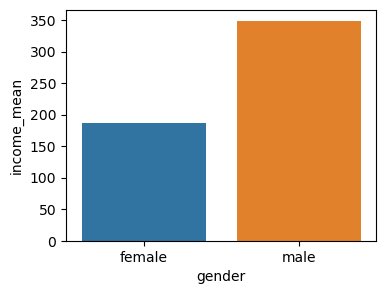

In [53]:
plt.figure(figsize=(4,3))
sns.barplot(data=gender_income,x='gender',y='income_mean')

In [54]:
wel_df_drop.describe()

,birth,income,code_job,code_region
count,6878.000000,4534.000000,6878.00000,6878.000000
mean,1966.705583,268.455007,587.54827,3.749927
std,16.272485,198.021206,264.23507,2.068335
min,1927.000000,0.000000,111.00000,1.000000
25%,1955.000000,150.000000,313.00000,2.000000
50%,1968.000000,220.000000,611.00000,3.000000
75%,1979.000000,345.750000,873.00000,6.000000
max,2001.000000,1892.000000,1009.00000,7.000000


In [55]:
wel_df_drop['income'] = np.where(wel_df_drop['income']==0,np.nan,wel_df_drop['income'])
wel_df_drop.describe()

,birth,income,code_job,code_region
count,6878.000000,4527.000000,6878.00000,6878.000000
mean,1966.705583,268.870113,587.54827,3.749927
std,16.272485,197.892421,264.23507,2.068335
min,1927.000000,2.000000,111.00000,1.000000
25%,1955.000000,150.000000,313.00000,2.000000
50%,1968.000000,220.000000,611.00000,3.000000
75%,1979.000000,346.000000,873.00000,6.000000
max,2001.000000,1892.000000,1009.00000,7.000000


In [56]:
wel_drop_median = wel_df_drop.groupby('code_job').agg(income_median=('income','median'))

In [57]:
wel_drop_median.query('income_median.isna()')

,income_median
code_job,
423.0,NaN
613.0,NaN
823.0,NaN


In [58]:
def fill_income(row):
    if np.isnan(row['income']):
        print(wel_drop_median.loc[row['code_job']].values[0])
        return wel_drop_median.loc[row['code_job']].values[0]
    else:
        return row['income']

In [59]:
print(wel_drop_median.loc[wel_df_drop['code_job']].values[0])

[303.]


In [ ]:
wel_df_drop['income'] = wel_df_drop.apply(fill_income,axis=1)
wel_df_drop

In [ ]:
wel_df_drop.query('income.isna()')

In [ ]:
#dropna(subset=['컬럼명'])
wel_df_drop_fill = wel_df_drop.dropna(subset=['income'])
wel_df_drop_fill

In [63]:
wel_drop_income = wel_df_drop_fill.groupby('gender',as_index=False).agg(income_mean=('income','mean'))

### 연령대별 수입 - 성별/연령대별 수입
#### job_code 데이터 결함
- 성별 많은 직업


In [70]:
wel_df['age'] = 2019-wel_df['birth']
wel_df

,gender,birth,marriage,religion,income,code_job,code_region,age
0,female,1945,etc,yes,NaN,NaN,1,74
1,male,1948,etc,no,NaN,NaN,1,71
2,male,1942,divorce,yes,107.0,762.0,1,77
3,male,1962,marriage,yes,192.0,855.0,1,57
4,female,1963,marriage,yes,NaN,NaN,1,56
...,...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5,52
14414,female,1992,not marriage,yes,NaN,NaN,5,27
14415,male,1995,not marriage,yes,NaN,910.0,5,24
14416,female,1998,not marriage,yes,200.0,246.0,5,21


In [72]:
wel_df['age'].describe()

count    14418.000000
mean        49.719795
std         24.402250
min          1.000000
25%         29.000000
50%         51.000000
75%         71.000000
max        112.000000
Name: age, dtype: float64

In [78]:
wel_age = wel_df.groupby('age',as_index=False).agg(income_mean=('income','mean'))
wel_age

,age,income_mean
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
97,98,NaN
98,99,NaN
99,100,NaN
100,102,NaN


In [80]:
wel_age_notna = wel_age.query("income_mean.notna()")
wel_age_notna

,age,income_mean
17,18,162.000000
18,19,121.333333
19,20,136.400000
20,21,123.666667
21,22,179.676471
...,...,...
86,87,27.000000
87,88,27.000000
88,89,27.000000
89,90,20.000000


c:\Users\SMHRD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SMHRD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='income_mean'>

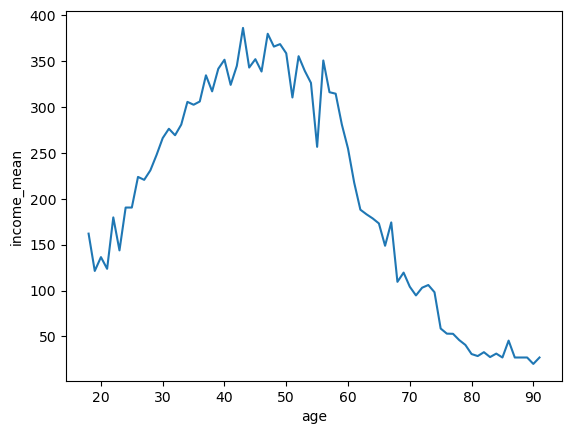

In [81]:
#sns.lineplot(data,x='컬럼명',y='컬럼명')
sns.lineplot(wel_age_notna,x='age',y='income_mean')

In [86]:
wel_gender_income = wel_df.groupby(['age','gender'],as_index=False).agg(income_mean=('income','mean'))
wel_gender_income

,age,gender,income_mean
0,1,female,NaN
1,1,male,NaN
2,2,female,NaN
3,2,male,NaN
4,3,female,NaN
...,...,...,...
195,99,female,NaN
196,100,female,NaN
197,100,male,NaN
198,102,male,NaN


In [88]:
wel_gender_notna = wel_gender_income.query("income_mean.notna()")

c:\Users\SMHRD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SMHRD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='income_mean'>

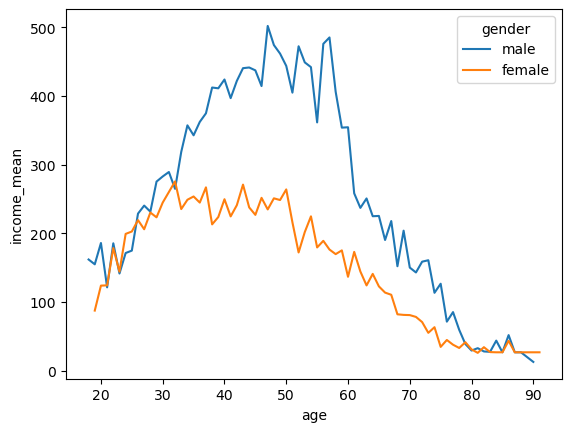

In [89]:
sns.lineplot(wel_gender_notna,x='age',y='income_mean',hue='gender')

- 남녀의 연봉차이는 40~60대가 가장 많이 차이난다.
- 남녀 연봉차이는 20~30에서 큰 차이가 없다.
- 남성은 30~40대에 연봉상승이 크다.
- 여성은 30~40대에 연봉 상승이 크다.

## 데이터 결합
# welfare - job_code

In [90]:
welfare

,gender,birth,marriage,religion,income,code_job,code_region
0,2,1945,2,1,NaN,NaN,1
1,1,1948,2,2,NaN,NaN,1
2,1,1942,3,1,107.0,762.0,1
3,1,1962,1,1,192.0,855.0,1
4,2,1963,1,1,NaN,NaN,1
...,...,...,...,...,...,...,...
14413,2,1967,1,1,NaN,NaN,5
14414,2,1992,5,1,NaN,NaN,5
14415,1,1995,5,1,NaN,910.0,5
14416,2,1998,5,1,200.0,246.0,5


In [91]:
job_code

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자
...,...,...
151,992,계기?자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [93]:
wel_job = pd.merge(welfare,job_code,how='left',on='code_job')

In [94]:
wel_job

,gender,birth,marriage,religion,income,code_job,code_region,job
0,2,1945,2,1,NaN,NaN,1,NaN
1,1,1948,2,2,NaN,NaN,1,NaN
2,1,1942,3,1,107.0,762.0,1,전기공
3,1,1962,1,1,192.0,855.0,1,금속기계 부품 조립원
4,2,1963,1,1,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
14413,2,1967,1,1,NaN,NaN,5,NaN
14414,2,1992,5,1,NaN,NaN,5,NaN
14415,1,1995,5,1,NaN,910.0,5,건설 및 광업 단순 종사자
14416,2,1998,5,1,200.0,246.0,5,보건 의료 관련 종사자


## 직업별 연봉

In [99]:
job_top = wel_job.groupby('job', as_index=False).agg(income_mean=('income','mean')).sort_values(by='income_mean',ascending=False)

In [ ]:
plt.xticks(rotation=90)
sns.barplot(data=job_top.head(10),x='job',y='income_mean')

In [ ]:
sns.barplot(data=job_top.head(10),x='income_mean',y='job')

- 남성의 직업 빈도표 / 여성의 직업 빈도표
- wel_job 사용
1. 결측치 제거
2. gender가 male 인 분만 추출
3. job을 그룹별로 묶기
4. job에 대한 빈도수 구하기.
5. 정렬 후 상위 10개 직업만 그래프로 그려보기


In [104]:
wel_job = pd.merge(wel_df,job_code,how='left',on='code_job')

In [105]:
wel_job

,gender,birth,marriage,religion,income,code_job,code_region,age,job
0,female,1945,etc,yes,NaN,NaN,1,74,NaN
1,male,1948,etc,no,NaN,NaN,1,71,NaN
2,male,1942,divorce,yes,107.0,762.0,1,77,전기공
3,male,1962,marriage,yes,192.0,855.0,1,57,금속기계 부품 조립원
4,female,1963,marriage,yes,NaN,NaN,1,56,NaN
...,...,...,...,...,...,...,...,...,...
14413,female,1967,marriage,yes,NaN,NaN,5,52,NaN
14414,female,1992,not marriage,yes,NaN,NaN,5,27,NaN
14415,male,1995,not marriage,yes,NaN,910.0,5,24,건설 및 광업 단순 종사자
14416,female,1998,not marriage,yes,200.0,246.0,5,21,보건 의료 관련 종사자


In [110]:
wel_job_not = wel_job.query("job.notna()")
wel_job_not

,gender,birth,marriage,religion,income,code_job,code_region,age,job
2,male,1942,divorce,yes,107.0,762.0,1,77,전기공
3,male,1962,marriage,yes,192.0,855.0,1,57,금속기계 부품 조립원
7,female,1934,marriage,yes,27.0,941.0,1,85,청소원 및 환경미화원
8,female,1940,etc,yes,27.0,999.0,2,79,기타 서비스 관련 단순 종사자
14,male,1978,marriage,no,338.0,312.0,1,41,경영 관련 사무원
...,...,...,...,...,...,...,...,...,...
14410,male,1956,marriage,yes,200.0,854.0,6,63,운송차량 및 기계 관련 조립원
14411,female,1958,marriage,yes,NaN,611.0,6,61,작물 재배 종사자
14412,male,1967,marriage,yes,NaN,874.0,5,52,물품 이동 장비 조작원
14415,male,1995,not marriage,yes,NaN,910.0,5,24,건설 및 광업 단순 종사자


In [113]:
wel_job_male = wel_job_not.query("gender=='male'")
wel_job_male

,gender,birth,marriage,religion,income,code_job,code_region,age,job
2,male,1942,divorce,yes,107.0,762.0,1,77,전기공
3,male,1962,marriage,yes,192.0,855.0,1,57,금속기계 부품 조립원
14,male,1978,marriage,no,338.0,312.0,1,41,경영 관련 사무원
22,male,1975,not marriage,yes,NaN,521.0,1,44,매장 판매 종사자
23,male,1978,marriage,no,NaN,151.0,1,41,판매 및 운송 관리자
...,...,...,...,...,...,...,...,...,...
14399,male,1941,marriage,no,NaN,611.0,6,78,작물 재배 종사자
14401,male,1966,marriage,yes,280.0,874.0,6,53,물품 이동 장비 조작원
14410,male,1956,marriage,yes,200.0,854.0,6,63,운송차량 및 기계 관련 조립원
14412,male,1967,marriage,yes,NaN,874.0,5,52,물품 이동 장비 조작원


In [116]:
wel_job_count = wel_job_male.groupby('job',as_index=False).agg(job_count=('job','count')).sort_values(by='job_count', ascending=False)
wel_job_count

,job,job_count
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
...,...,...
132,통계 관련 사무원,1
54,발전 및 배전장치 조작원,1
142,혼례 및 장례 종사자,1
126,철도운송 관련 종사자,1


<Axes: xlabel='job_count', ylabel='job'>

c:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
c:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  func(*args, **kwargs)
c:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\SMHRD\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from curren

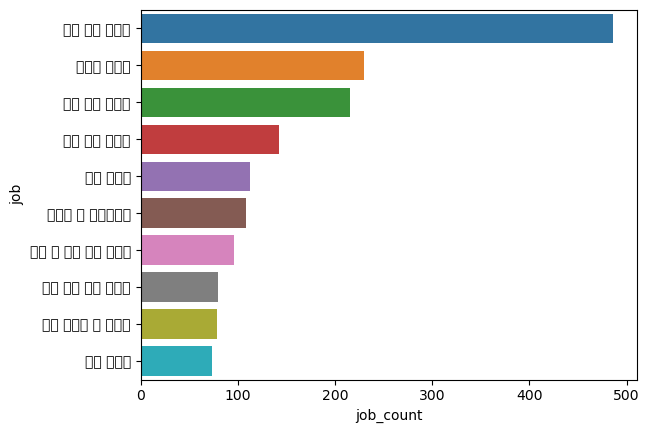

In [118]:
sns.barplot(data=wel_job_count.head(10),x='job_count',y='job')